In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv('/content/penguins_size.csv')

In [63]:
df.head

<bound method NDFrame.head of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body

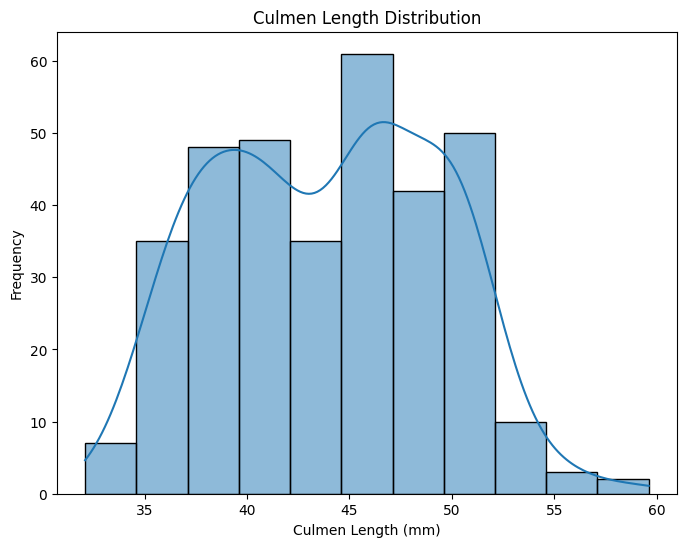

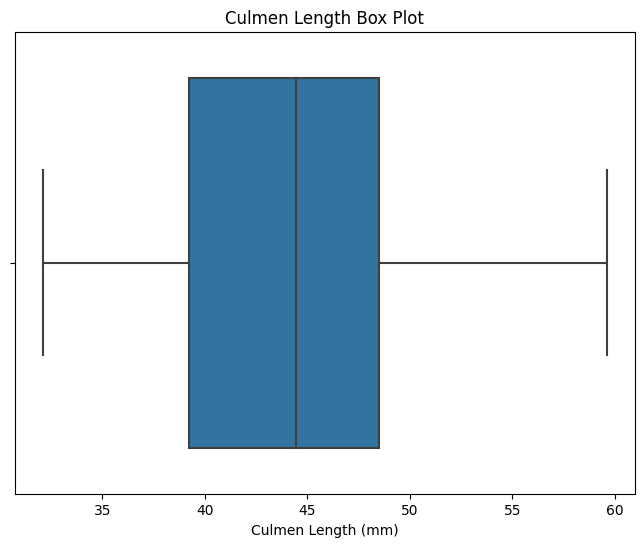

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(df['culmen_length_mm'], kde=True)
plt.title('Culmen Length Distribution')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['culmen_length_mm'])
plt.title('Culmen Length Box Plot')
plt.xlabel('Culmen Length (mm)')
plt.show()

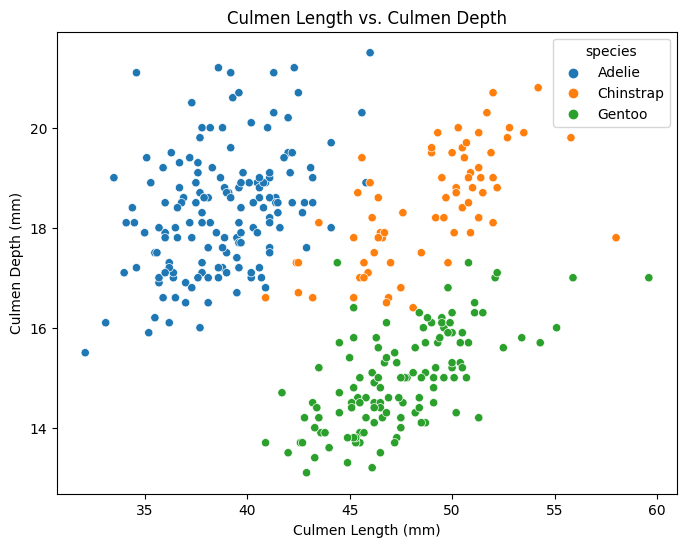

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['culmen_length_mm'], y=df['culmen_depth_mm'], hue=df['species'])
plt.title('Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

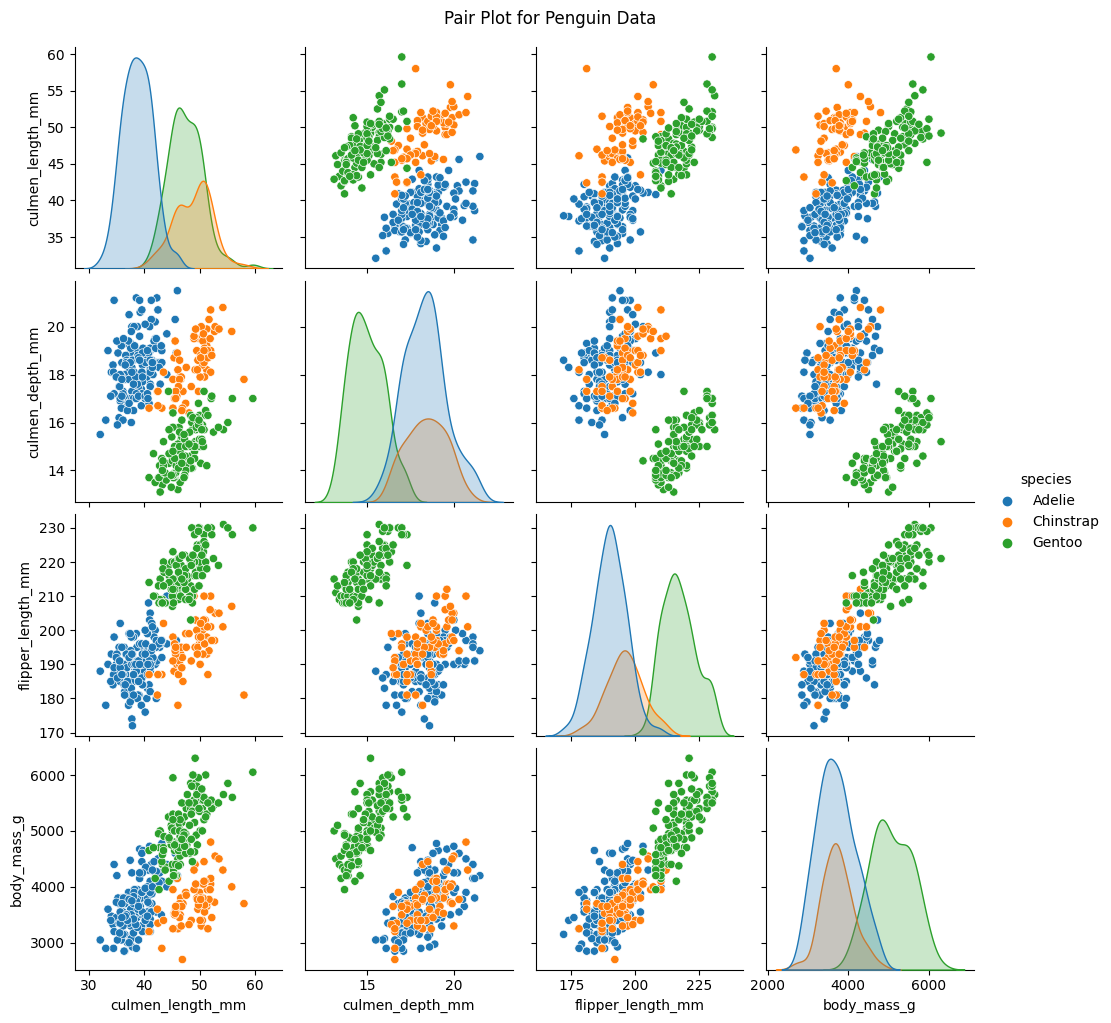

In [66]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot for Penguin Data', y=1.02)
plt.show()

In [67]:
descriptive_stats = df.describe()
print(descriptive_stats)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [68]:
missing_values = df.isnull().sum()
print(missing_values)
# Option 1: Drop the values
df_cleaned = df.dropna()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [69]:
missing_values = df.isnull().sum()
print(missing_values)
# Option 2: Impute missing values (e.g., using mean, median, mode)
df_imputed = df.fillna(df.mean())
final_missing_values = df_cleaned.isnull().sum()
print(final_missing_values)


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


<ipython-input-69-f3e6bf30b46d>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = df.fillna(df.mean())


In [70]:
def find_replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

outliers_culmen_length = find_replace_outliers(df, 'culmen_length_mm')
outliers_culmen_depth = find_replace_outliers(df, 'culmen_depth_mm')
outliers_flipper_length = find_replace_outliers(df, 'flipper_length_mm')
outliers_body_mass = find_replace_outliers(df, 'body_mass_g')

df.loc[outliers_culmen_length, 'culmen_length_mm'] = df['culmen_length_mm'].mean()
df.loc[outliers_culmen_depth, 'culmen_depth_mm'] = df['culmen_depth_mm'].mean()
df.loc[outliers_flipper_length, 'flipper_length_mm'] = df['flipper_length_mm'].mean()
df.loc[outliers_body_mass, 'body_mass_g'] = df['body_mass_g'].mean()


In [71]:
df['IsAdelie'] = (df['species'] == 'Adelie').astype(int)
correlation_with_isadelie = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corrwith(df['IsAdelie'])

print("Correlation with IsAdelie:")
print(correlation_with_isadelie)


Correlation with IsAdelie:
culmen_length_mm    -0.836780
culmen_depth_mm      0.538917
flipper_length_mm   -0.694132
body_mass_g         -0.556385
dtype: float64


In [72]:
categorical_columns = ['species', 'island']
print("Categorical Columns:")
print(categorical_columns)
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X_encoded = pd.get_dummies(X[categorical_columns])
label_encoder = LabelEncoder()

print("Encoded DataFrame:")
print(df_encoded.head())


Categorical Columns:
['species', 'island']
Encoded DataFrame:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
3               NaN              NaN                NaN          NaN     NaN   
4              36.7             19.3              193.0       3450.0  FEMALE   

   IsAdelie  species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  
0         1                  0               0             0                 1  
1         1                  0               0             0                 1  
2         1                  0               0             0                 1  
3         1                  0               0             0                 1  
4         1                  0               0      

In [73]:
scaler = StandardScaler()
categorical_columns = ['species', 'island']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X_encoded = pd.get_dummies(X[categorical_columns])

X_scaled = scaler.fit_transform(df_encoded[numerical_columns])

X_final = pd.concat([pd.DataFrame(X_scaled, columns=numerical_columns), X_encoded], axis=1)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [75]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (240, 10)
Shape of X_test: (104, 10)
Shape of y_train: (240,)
Shape of y_test: (104,)
